In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CRISPR_DATA_FILE = "/oak/stanford/groups/engreitz/Users/atan5133/encode_e2g_features/results/K562_dnase_no_qnorm/EPCrisprBenchmark_ensemble_data_GRCh38.K562_ActivityOnly_features_NAfilled.tsv.gz"
TPM_FILE = "/oak/stanford/groups/engreitz/Users/atan5133/encode_e2g_features/rna_tpm.tsv"

In [4]:
data_df = pd.read_csv(CRISPR_DATA_FILE, sep="\t")
tpm_df = pd.read_csv(TPM_FILE, sep="\t", index_col=0)
# merge DF based on measuredGeneSymbol and index
data_df = data_df.merge(tpm_df, how='left', left_on='measuredGeneSymbol', right_index=True)
data_df["TPM"].fillna(0, inplace=True)

In [27]:
groups = data_df.groupby("measuredGeneSymbol")

In [58]:
x, y = [], []
for gene, group in groups:
    tpm = group.TPM.max()
    num_enh = (group["Significant"] == True).sum()
    x.append(tpm)
    y.append(num_enh)

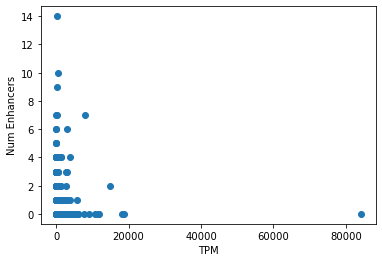

Plotted 2146 points


In [59]:
plt.scatter(x, y)
plt.xlabel('TPM')
plt.ylabel('Num Enhancers')
plt.show()
print(f"Plotted {len(x)} points")